In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Get the directory of the current file
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
labels_file = os.path.join(parent_dir, 'data', 'labels.csv')

df=pd.read_csv(labels_file, index_col=0).astype(int)
df.iloc[:, 1:] = df.iloc[:, 1:].iloc[:, ::-1]



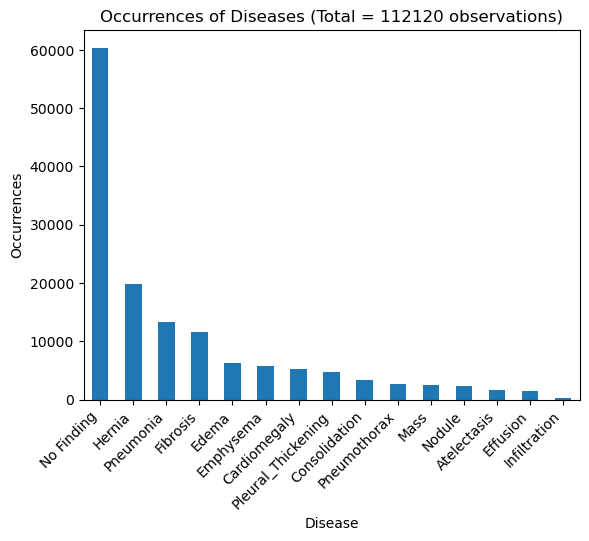

In [2]:
occurance = df.sum(axis=0)

occurance.plot(kind='bar')
plt.xlabel('Disease')
plt.ylabel('Occurrences')
plt.title(f'Occurrences of Diseases (Total = {len(df)} observations)')
plt.xticks(rotation=45, ha='right')
plt.show()

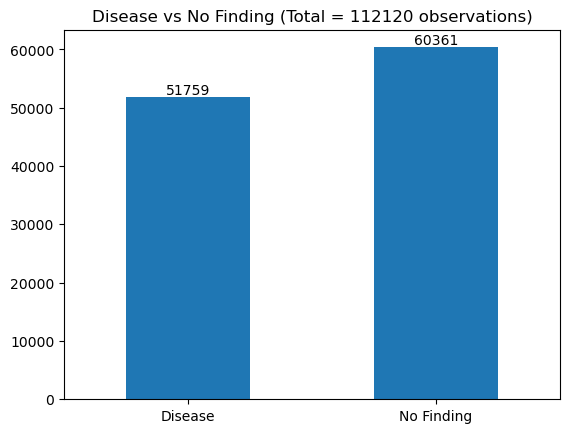

In [7]:
disease_vs_nodisease = {"Disease": [len(df)-occurance["No Finding"]], "No Finding": [occurance["No Finding"]]}
disease_vs_nodisease = pd.DataFrame(disease_vs_nodisease).T
disease_vs_nodisease.plot(kind='bar')
plt.legend().set_visible(False)
plt.title(f'Disease vs No Finding (Total = {len(df)} observations)')

# Add bar values at the top of the bars
for i, v in enumerate(disease_vs_nodisease[0]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()


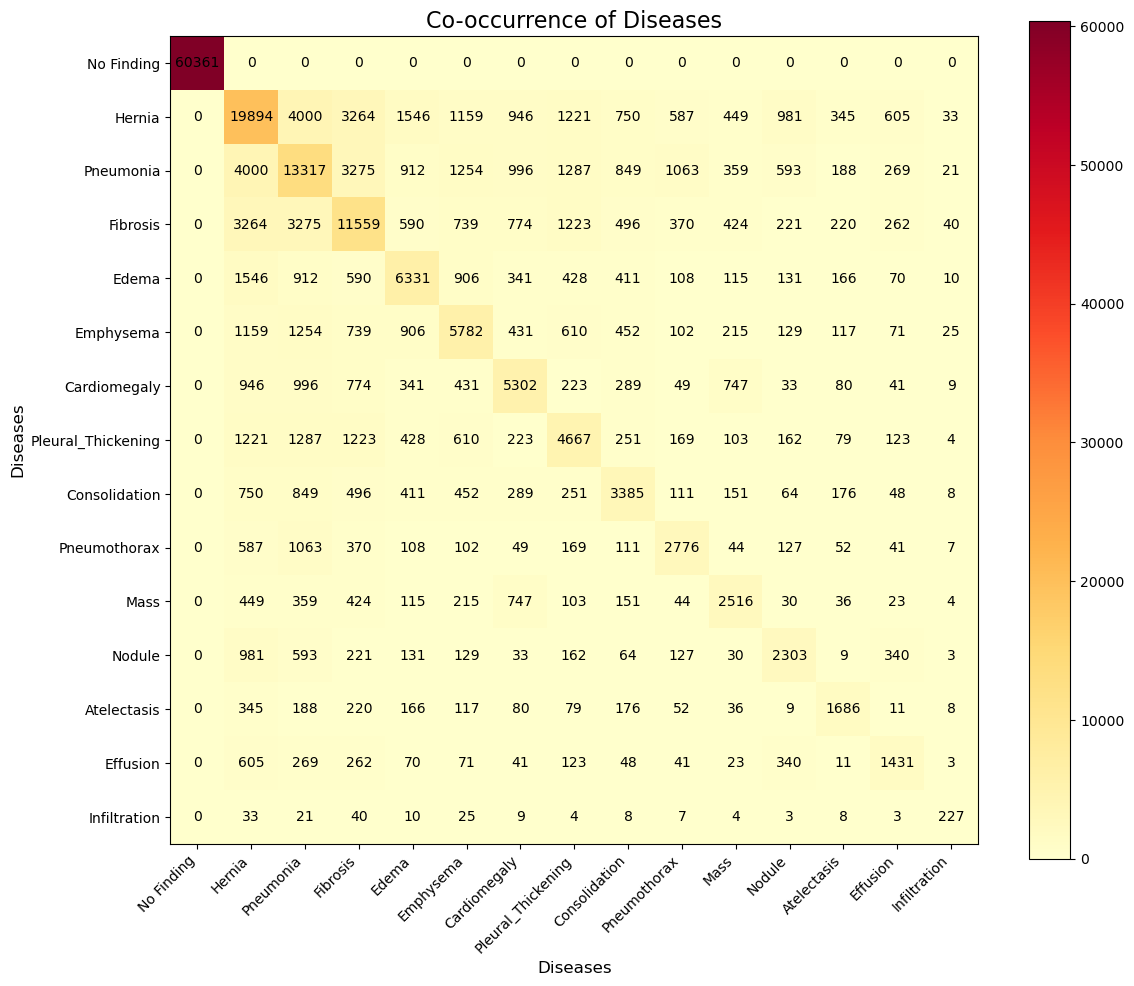

In [4]:
co_occurrence = df.T.dot(df)

plt.figure(figsize=(12, 10))
plt.imshow(co_occurrence, cmap='YlOrRd', interpolation='nearest')


plt.colorbar()

plt.xticks(ticks=np.arange(len(co_occurrence.columns)), labels=co_occurrence.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(co_occurrence.index)), labels=co_occurrence.index)

for i in range(len(co_occurrence.index)):
    for j in range(len(co_occurrence.columns)):
        plt.text(j, i, co_occurrence.iat[i, j], ha='center', va='center', color='black')

plt.title('Co-occurrence of Diseases', fontsize=16)
plt.xlabel('Diseases', fontsize=12)
plt.ylabel('Diseases', fontsize=12)

plt.tight_layout()
plt.show()